### CHENNAI HOUSE PRICE PREDICTION

#### Importing the all required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor

In [2]:
df=pd.read_csv('C:/Users/Damodhara/Desktop/GUVI Class links/Kousik/Project/train-chennai-sale.csv')

In [3]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


#### Droping Unnecessary data 

In [4]:
df.drop(['PRT_ID','REG_FEE','COMMIS'],axis=1,inplace=True)
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250


In [5]:
df.shape

(7109, 19)

### Checking for Null Values

In [6]:
df.isnull().sum()

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
SALES_PRICE       0
dtype: int64

###### I found Null values present in N_BEDROME,N_BATHROOM and QS_OVERALL 

In [7]:
print(df['N_BEDROOM'].value_counts())

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64


In [8]:
df['N_BEDROOM'].fillna(df['N_BEDROOM'].mode()[0],inplace=True)

In [9]:
df['N_BATHROOM'].value_counts()

1.0    5589
2.0    1515
Name: N_BATHROOM, dtype: int64

In [10]:
df['N_BATHROOM'].fillna(df['N_BATHROOM'].mode()[0],inplace=True)

In [11]:
df['QS_OVERALL'].value_counts()

3.540    59
3.260    57
3.320    56
3.560    55
3.360    54
         ..
2.545     1
2.110     1
3.965     1
4.345     1
4.940     1
Name: QS_OVERALL, Length: 479, dtype: int64

In [12]:
df["QS_OVERALL"].fillna(df["QS_OVERALL"].median(),inplace=True)

In [13]:
df.isnull().sum()

AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
SALES_PRICE      0
dtype: int64

######     All the null values are filled , using  Mode , Median

### Dropping the Duplicates

In [14]:
df=df.drop_duplicates()
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE'],
      dtype='object')

In [15]:
df.dtypes

AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
SALES_PRICE        int64
dtype: object

##### some of the column in the data set not proper datatypes, so i decided to change them int proper datatypes

In [16]:
df['DATE_SALE'] = pd.to_datetime(df['DATE_SALE'],format='%d-%m-%Y')
df['DATE_BUILD'] = pd.to_datetime(df['DATE_BUILD'],format='%d-%m-%Y')
df["N_BEDROOM"]=df["N_BEDROOM"].astype(int)
df["N_BATHROOM"]=df["N_BATHROOM"].astype(int)

In [17]:
df.dtypes

AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM                 int32
N_BATHROOM                int32
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
SALES_PRICE               int64
dtype: object

#### Deriving the Age Column

In [18]:
df['AGE']=pd.DatetimeIndex(df['DATE_SALE']).year - pd.DatetimeIndex(df['DATE_BUILD']).year

In [19]:
df.dtypes

AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM                 int32
N_BATHROOM                int32
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
SALES_PRICE               int64
AGE                       int64
dtype: object

In [20]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
0,Karapakkam,1004,2011-05-04,131,1,1,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,Adyar,909,2012-02-04,70,1,1,3,AbNormal,Yes,1992-02-09,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,Velachery,1855,2010-03-13,14,3,2,5,Family,No,1988-03-18,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,Karapakkam,1226,2009-10-05,84,1,1,3,AbNormal,Yes,1979-10-13,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30


In [21]:
df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
count,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7.109000e+03,7109.000000
mean,1382.073006,99.603179,1.636939,1.213110,3.688704,3.517471,3.507244,3.485300,3.503232,1.089491e+07,24.276270
std,457.410902,57.403110,0.802881,0.409534,1.019099,0.891972,0.897834,0.887266,0.525440,3.768603e+06,12.334164
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.156875e+06,3.000000
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,8.272100e+06,14.000000
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,1.033505e+07,23.000000
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.880000,1.299390e+07,34.000000
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,2.366734e+07,55.000000


#### Checking Unique Elements in Categorical Columns

In [22]:
print(df['AREA'].unique())
print(df['SALE_COND'].unique())
print(df['PARK_FACIL'].unique())
print(df['BUILDTYPE'].unique())
print(df['UTILITY_AVAIL'].unique())
print(df['STREET'].unique())
print(df['MZZONE'].unique())

['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar']
['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']
['Yes' 'No' 'Noo']
['Commercial' 'Others' 'Other' 'House' 'Comercial']
['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub']
['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']
['A' 'RH' 'RL' 'I' 'C' 'RM']


In some columns the spellings are not correct, so i decided to Replace them with correct spellings

#### Replacing the Correcting the spelling Mistakes

In [23]:
df['AREA'].replace(['Karapakam'],'Karapakkam',inplace=True)
df['AREA'].replace(['Ana Nagar','Ana Nagar','Ann Nagar'],'Anna Nagar',inplace=True)
df['AREA'].replace(['Adyr'],'Adyar',inplace=True)
df['AREA'].replace(['Velchery'],'Velachery',inplace=True)
df['AREA'].replace(['Chormpet','Chrmpet','Chrompt'],'Chrompet',inplace=True)
df['AREA'].replace(['KKNagar',],'KK Nagar',inplace=True)
df['AREA'].replace(['TNagar'],  'T Nagar', inplace = True)


df['SALE_COND'].replace(['AbNormal','Ab Normal'],'abnormal',inplace=True)
df['SALE_COND'].replace(['Partial','Partiall','PartiaLl'],'partial',inplace=True)
df['SALE_COND'].replace(['AdjLand','Adj Land'],'adjland',inplace=True)
df.SALE_COND=df.SALE_COND.str.lower()


df['PARK_FACIL'].replace(['Noo'],'No',inplace=True)

df['BUILDTYPE'].replace(['Other'],'Others',inplace=True)
df['BUILDTYPE'].replace(['Comercial'],'Commercial',inplace=True)

df['UTILITY_AVAIL'].replace(['All Pub'],'AllPub',inplace=True)
df['UTILITY_AVAIL'].replace(['NoSewr ', 'NoSeWa'],'NoSewr',inplace=True)

df['STREET'].replace(['Pavd'],'Paved',inplace=True)
df['STREET'].replace(['NoAccess'],'No Access',inplace=True)

In [24]:
print(df['AREA'].unique())
print(df['SALE_COND'].unique())
print(df['PARK_FACIL'].unique())
print(df['BUILDTYPE'].unique())
print(df['UTILITY_AVAIL'].unique())
print(df['STREET'].unique())
print(df['MZZONE'].unique())

['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'T Nagar']
['abnormal' 'family' 'partial' 'adjland' 'normal sale']
['Yes' 'No']
['Commercial' 'Others' 'House']
['AllPub' 'ELO' 'NoSewr']
['Paved' 'Gravel' 'No Access']
['A' 'RH' 'RL' 'I' 'C' 'RM']


In [25]:
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE', 'AGE'],
      dtype='object')

# Exploratory Data Analysis

#### EDA For Categorical Columns

##### Relationship in between the AREA feature and SALES_PRICE.

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

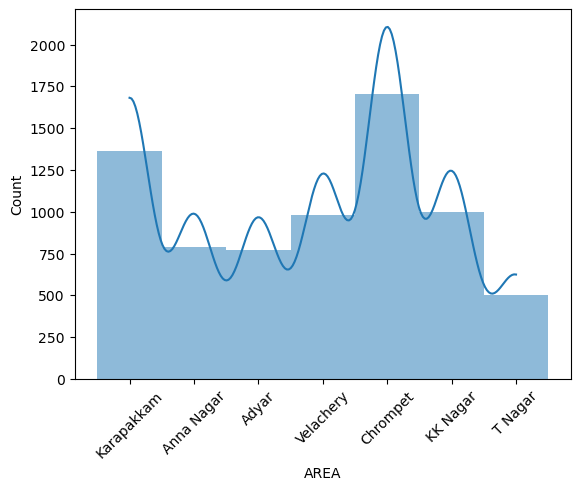

In [26]:
sns.histplot(df.AREA, linewidth=0, kde=True)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Karapakkam'),
  Text(1, 0, 'Adyar'),
  Text(2, 0, 'Chrompet'),
  Text(3, 0, 'Velachery'),
  Text(4, 0, 'KK Nagar'),
  Text(5, 0, 'Anna Nagar'),
  Text(6, 0, 'T Nagar')])

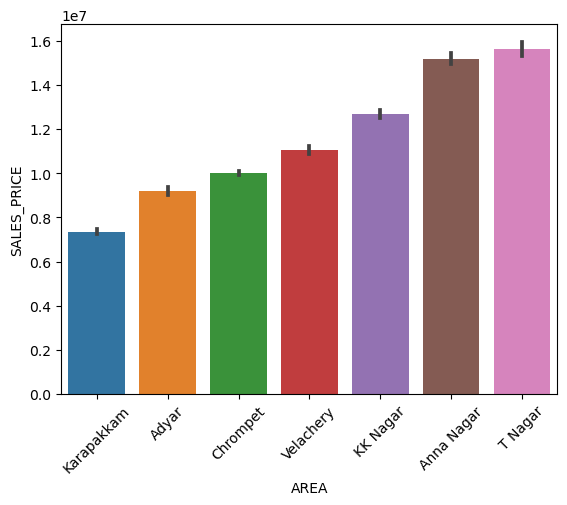

In [27]:
area_order = df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA']
sns.barplot(x='AREA',y='SALES_PRICE',data=df,order = area_order)
plt.xticks(rotation=45)

##### Relationship in between the SALE_COND Feature and SALES_PRICE 


([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

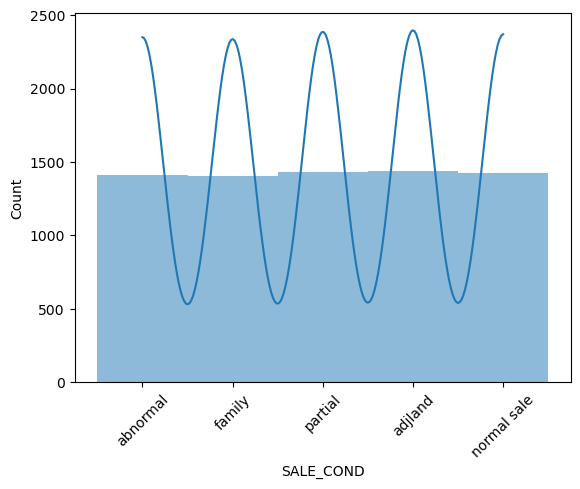

In [28]:
sns.histplot(df.SALE_COND, linewidth=0,kde=True)
plt.xticks(rotation=45)

<AxesSubplot:xlabel='SALE_COND', ylabel='SALES_PRICE'>

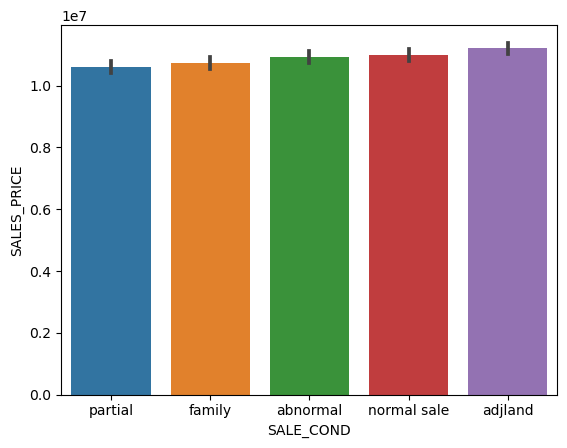

In [29]:
sale_cond_order = df.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND']
sns.barplot(x='SALE_COND',y='SALES_PRICE',data=df,order = sale_cond_order)

In SALE_COND condition Column, all Categories are uniformly distributed.

1)There is no Relationship between SALE_COND Feature and SALES_PRICE Target Columns.

2)will drop the SALE_COND feature from this dataset.

##### Relationship in between the PARK_FACIL Feature and SALES_PRICE 


([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

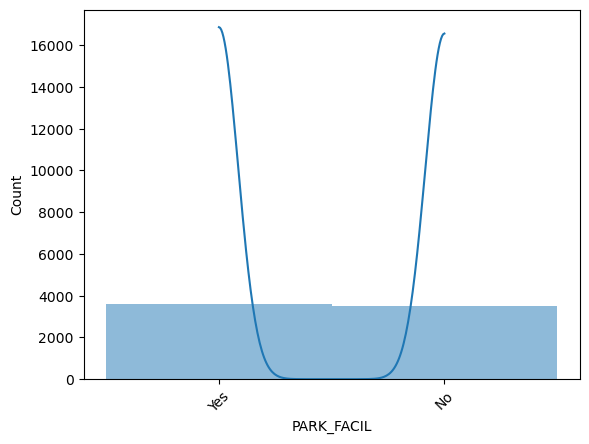

In [30]:
sns.histplot(df.PARK_FACIL, linewidth=0,kde=True)
plt.xticks(rotation=45)

<AxesSubplot:xlabel='PARK_FACIL', ylabel='SALES_PRICE'>

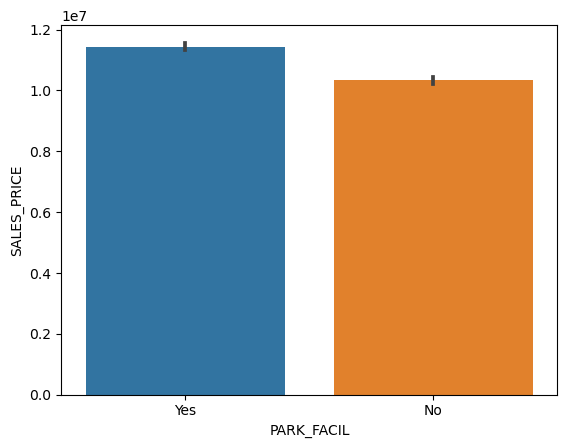

In [31]:
sns.barplot(x='PARK_FACIL',y='SALES_PRICE',data=df)

The above plot shows,Houses having Park Facilities are more expensive than the houses with no park facility.

1)There is a strong linear relationship in between PARK_FACIL Feature and SALES_PRICE Target. 
2)This feature is very useful at the time of model fitting

##### Relationship in between the BUILDTYPE Feature and SALES_PRICE 


([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

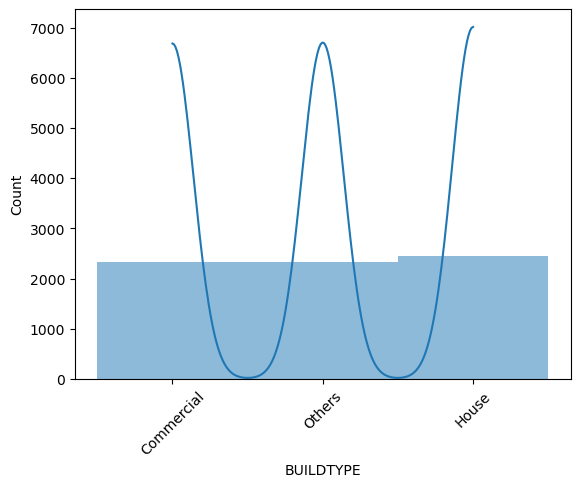

In [32]:
sns.histplot(df.BUILDTYPE, linewidth=0,kde=True)
plt.xticks(rotation=45)

<AxesSubplot:xlabel='BUILDTYPE', ylabel='SALES_PRICE'>

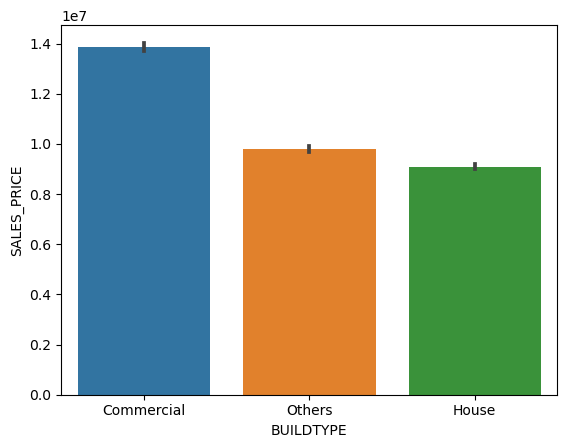

In [33]:
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=df)

##### Relationship in between the UTILITY_AVAIL Feature and SALES_PRICE


([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

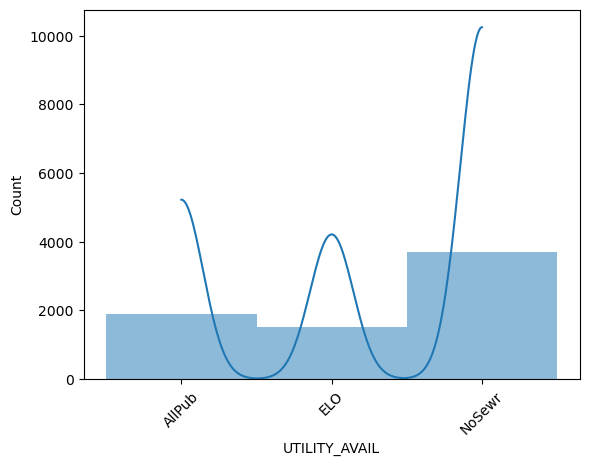

In [34]:
sns.histplot(df.UTILITY_AVAIL, linewidth=0,kde=True)
plt.xticks(rotation=45)

<AxesSubplot:xlabel='UTILITY_AVAIL', ylabel='SALES_PRICE'>

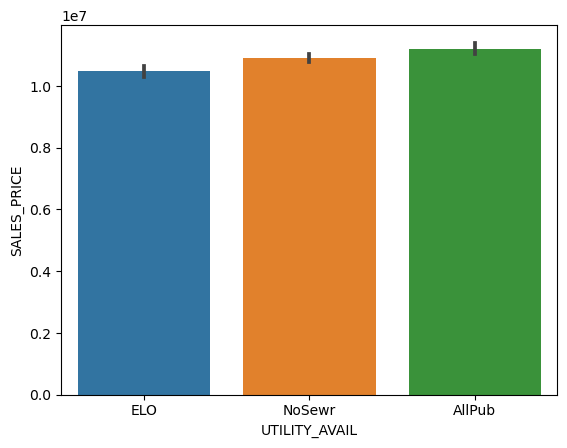

In [35]:
utility_avail_order=df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL']
sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=df,order=utility_avail_order)

From above plot shows, Linear relationship in between UTILITY_AVAIL and SALES_PRICE.

So, will do label encoding for UTILITY_AVAIL Column for model fitting.

##### Relationship in between the STREET feature and SALES_PRICE.

<AxesSubplot:xlabel='STREET', ylabel='Count'>

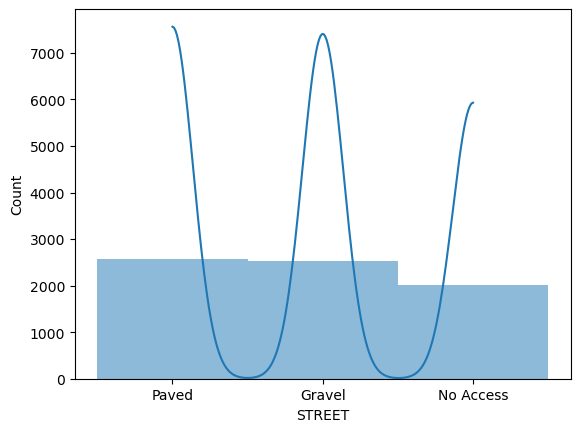

In [36]:
sns.histplot(df.STREET, linewidth=0,kde=True)

<AxesSubplot:xlabel='STREET', ylabel='SALES_PRICE'>

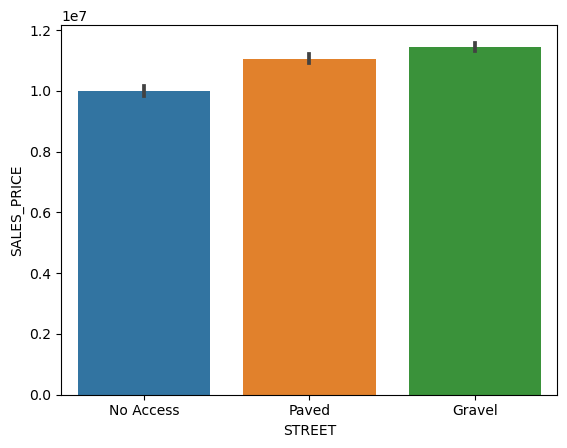

In [37]:
street_order = df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET']
sns.barplot(x='STREET',y='SALES_PRICE',data=df,order = street_order)

##### Relationship in between the MZZONE feature and SALES_PRICE.

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

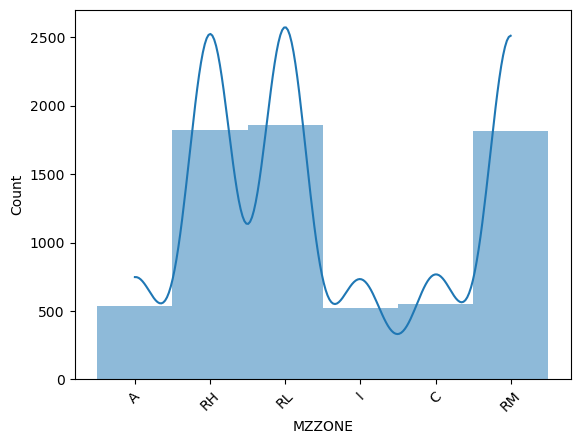

In [38]:
sns.histplot(df.MZZONE, linewidth=0,kde=True)
plt.xticks(rotation=45)

<AxesSubplot:xlabel='MZZONE', ylabel='SALES_PRICE'>

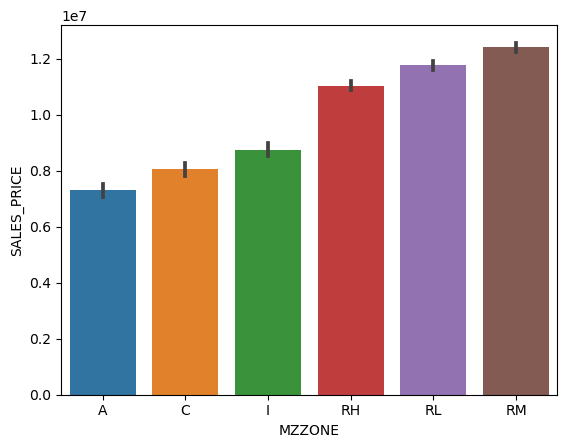

In [39]:
mzzone_order = df.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE']
sns.barplot(x='MZZONE',y='SALES_PRICE',data=df,order = mzzone_order)

##### Relationship in between the N_BEDROOM Feature and SALES_PRICE

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

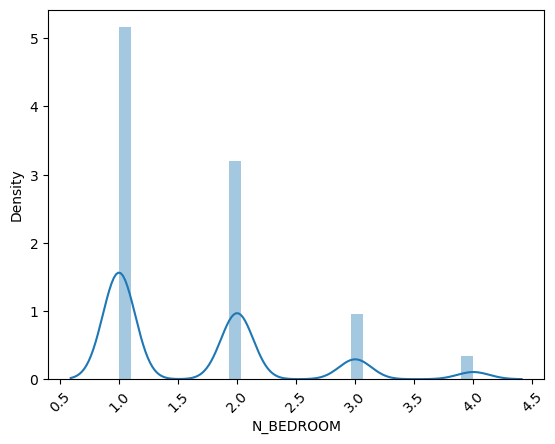

In [40]:
sns.distplot(df['N_BEDROOM'])
plt.xticks(rotation = 45)

<AxesSubplot:xlabel='N_BEDROOM', ylabel='SALES_PRICE'>

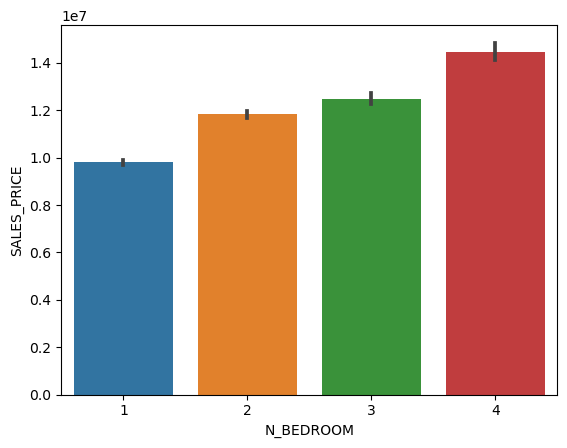

In [41]:
sns.barplot(x='N_BEDROOM',y='SALES_PRICE',data=df)

##### Relationship in between the N_BATHROOM feature and SALES_PRICE.

(array([0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

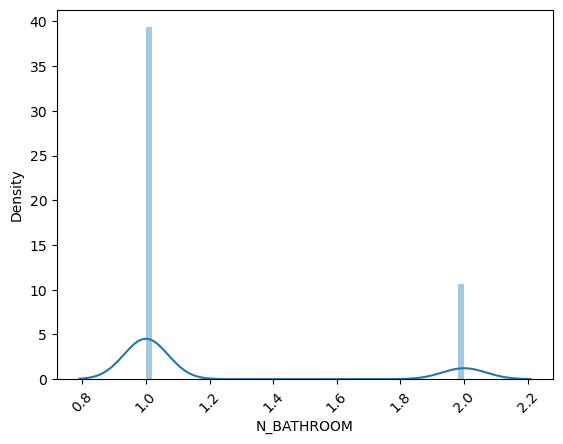

In [42]:
sns.distplot(df['N_BATHROOM'])
plt.xticks(rotation = 45)

<AxesSubplot:xlabel='N_BATHROOM', ylabel='SALES_PRICE'>

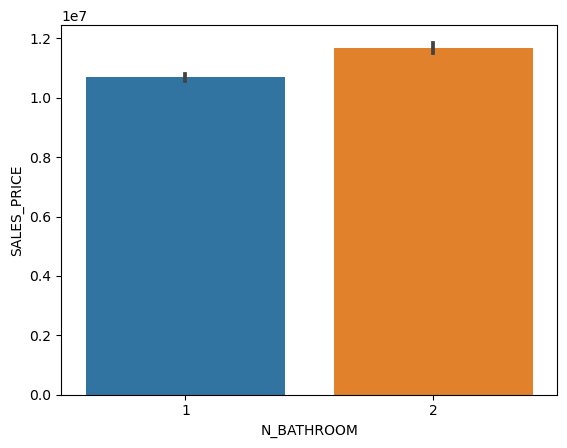

In [43]:
sns.barplot(x='N_BATHROOM',y='SALES_PRICE',data=df)

From the above plot N_BATHROOM increases then SALES_PRICE is automatically increasing.

So Linear relationship in between the N_BATHROOM feature and SALES_PRICE.

##### Relationship in between the N_ROOM feature and SALES_PRICE.

(array([1., 2., 3., 4., 5., 6., 7.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

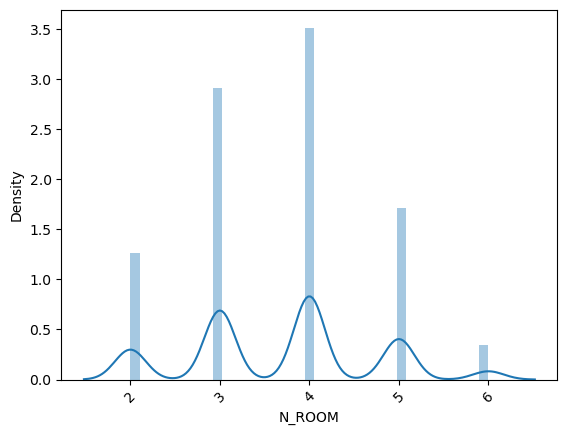

In [44]:
sns.distplot(df['N_ROOM'])
plt.xticks(rotation = 45)

<AxesSubplot:xlabel='N_ROOM', ylabel='SALES_PRICE'>

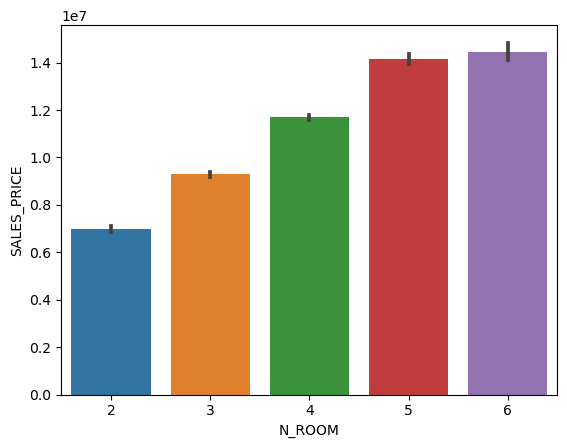

In [45]:
sns.barplot(x='N_ROOM',y='SALES_PRICE',data=df)

From the above plot N_ROOMS increases then SALES_PRICE alos increasing.

There is a relationship in between the N_ROOM Feature and SALES_PRICE Target columns.

#### EDA for Numerical Columns

##### Relationship in between the INT_SQFT feature and SALES_PRICE 

<AxesSubplot:xlabel='INT_SQFT', ylabel='Density'>

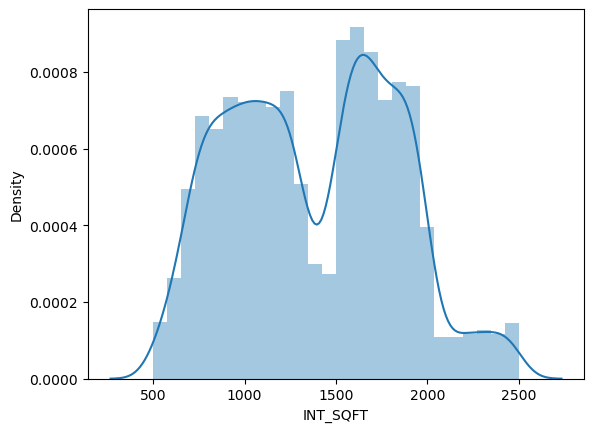

In [46]:
sns.distplot(df['INT_SQFT'])

<AxesSubplot:xlabel='INT_SQFT', ylabel='SALES_PRICE'>

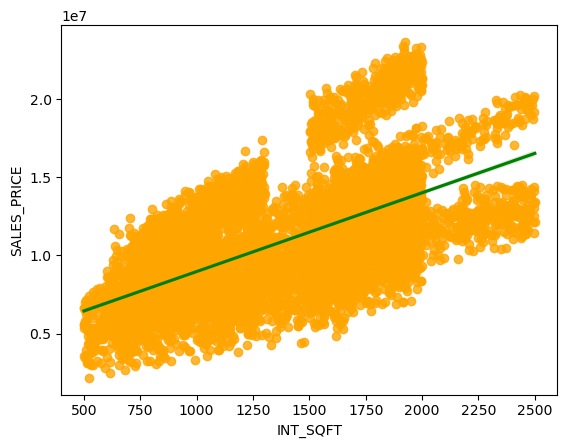

In [47]:
sns.regplot(x='INT_SQFT',y='SALES_PRICE',data=df,scatter_kws={'color':'orange'},line_kws={'color':'green'})

From the above plot Linear relationship in between the INT_SQFT feature and SALES_PRICE.

##### Relationship in between the DIST_MAINROAD feature and SALES_PRICE.

<AxesSubplot:xlabel='DIST_MAINROAD', ylabel='Density'>

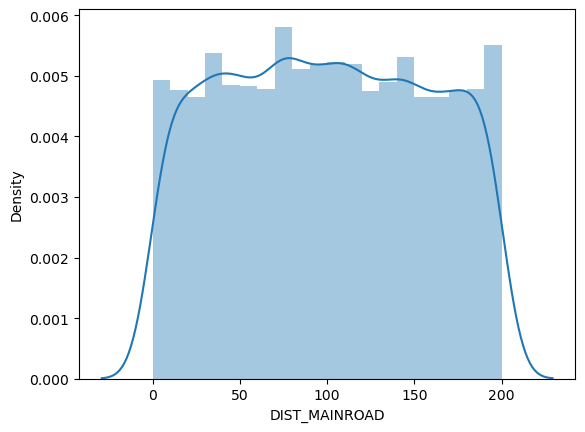

In [48]:
sns.distplot(df['DIST_MAINROAD'])

<AxesSubplot:xlabel='DIST_MAINROAD', ylabel='SALES_PRICE'>

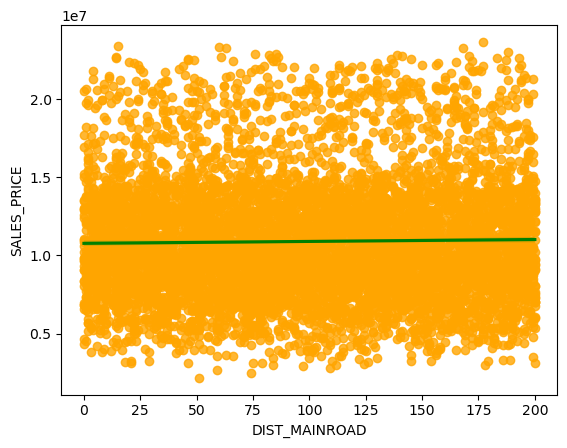

In [49]:
sns.regplot(x='DIST_MAINROAD',y='SALES_PRICE',data=df,scatter_kws={'color':'orange'},line_kws={'color':'green'})

No relationship in between the DIST_MAINROAD feature and SALES_PRICE.

##### Relationship in between the QS_ROOMS feature and SALES_PRICE

<AxesSubplot:xlabel='QS_ROOMS', ylabel='Density'>

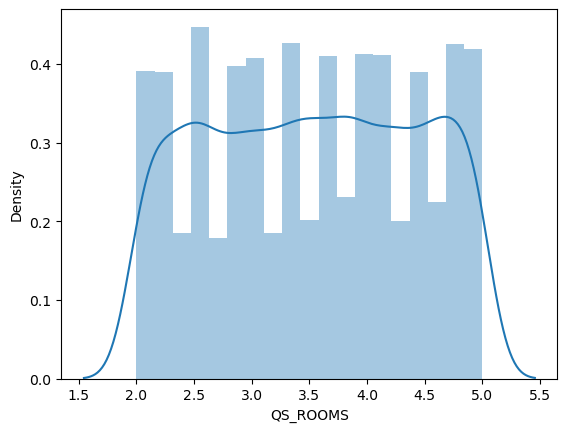

In [50]:
sns.distplot(df['QS_ROOMS'])

<AxesSubplot:xlabel='QS_ROOMS', ylabel='SALES_PRICE'>

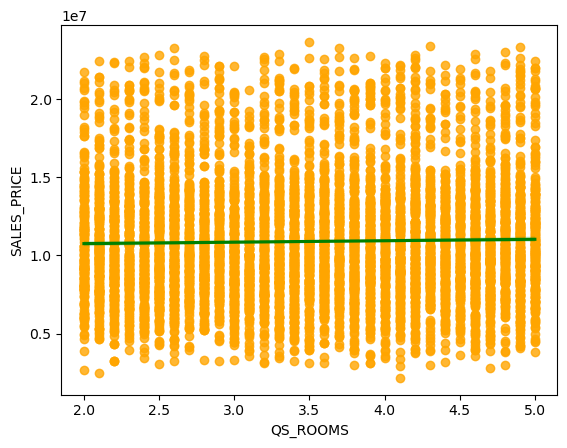

In [51]:
sns.regplot(x='QS_ROOMS',y='SALES_PRICE',data=df,scatter_kws={'color':'orange'},line_kws={'color':'green'})

No relationship between QS_ROOMS feature and SALES_PRICE.

##### Relationship in between the QS_BEDROOM feature and SALES_PRICE.

<AxesSubplot:xlabel='QS_BEDROOM', ylabel='Density'>

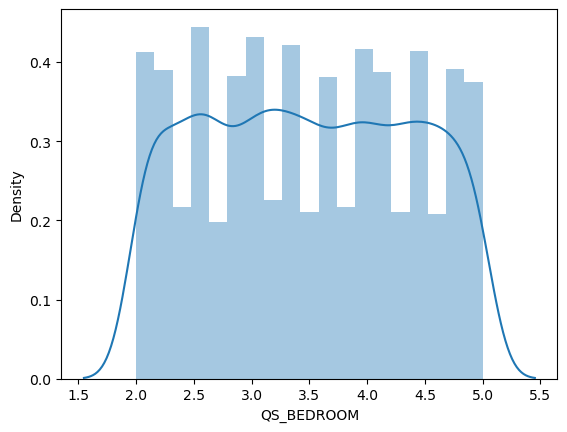

In [52]:
sns.distplot(df['QS_BEDROOM'])

<AxesSubplot:xlabel='QS_BEDROOM', ylabel='SALES_PRICE'>

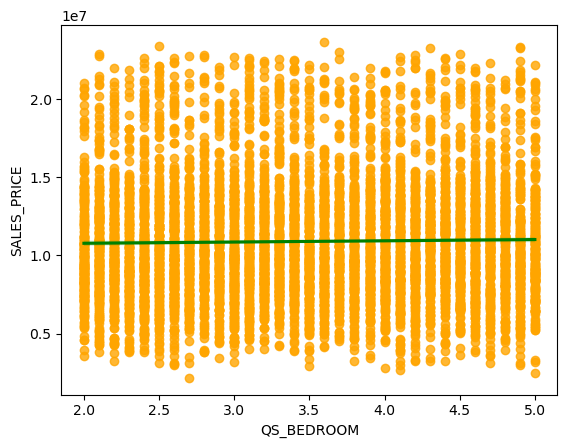

In [53]:
sns.regplot(x='QS_BEDROOM',y='SALES_PRICE',data=df,scatter_kws={'color':'orange'},line_kws={'color':'green'})

No relationship in between the QS_BEDROOM feature and SALES_PRICE.

##### Relationship in between the QS_BATHROOM feature and SALES_PRICE.

<AxesSubplot:xlabel='QS_BATHROOM', ylabel='Density'>

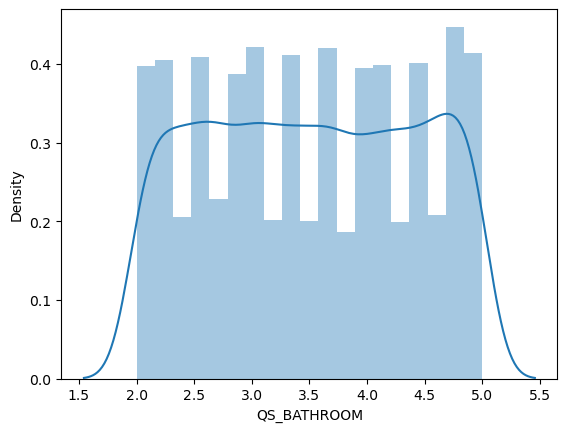

In [54]:
sns.distplot(df['QS_BATHROOM'])

<AxesSubplot:xlabel='QS_BATHROOM', ylabel='SALES_PRICE'>

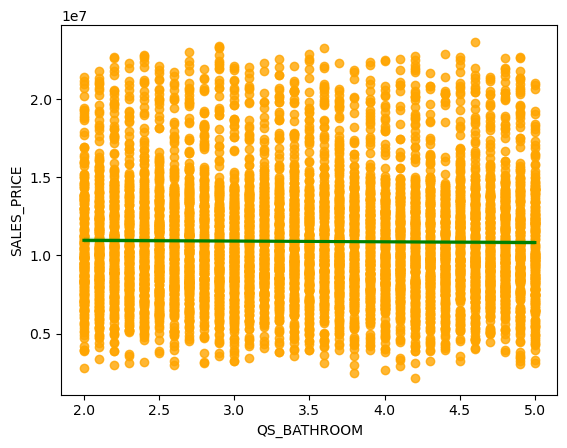

In [55]:
sns.regplot(x='QS_BATHROOM',y='SALES_PRICE',data=df,scatter_kws={'color':'orange'},line_kws={'color':'green'})

No Linear relationship in between the QS_BATHROOM feature and SALES_PRICE.

##### Relation in between the QS_OVERALL feature and SALES_PRICE.

<AxesSubplot:xlabel='QS_OVERALL', ylabel='Density'>

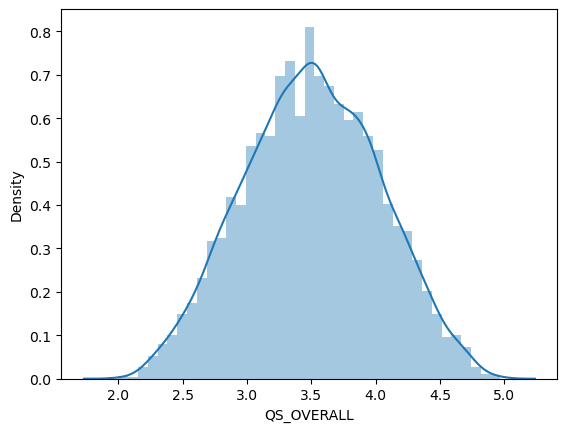

In [56]:
sns.distplot(df['QS_OVERALL'])

<AxesSubplot:xlabel='QS_OVERALL', ylabel='SALES_PRICE'>

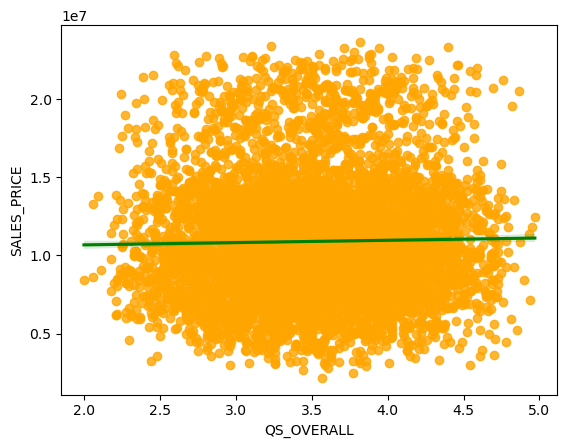

In [57]:
sns.regplot(x='QS_OVERALL',y='SALES_PRICE',data=df,scatter_kws={'color':'orange'},line_kws={'color':'green'})

No Relationship in between the QS_OVERALL and SALES_PRICE

##### Relationship in between the AGE feature and SALES_PRICE.

<AxesSubplot:xlabel='AGE', ylabel='Density'>

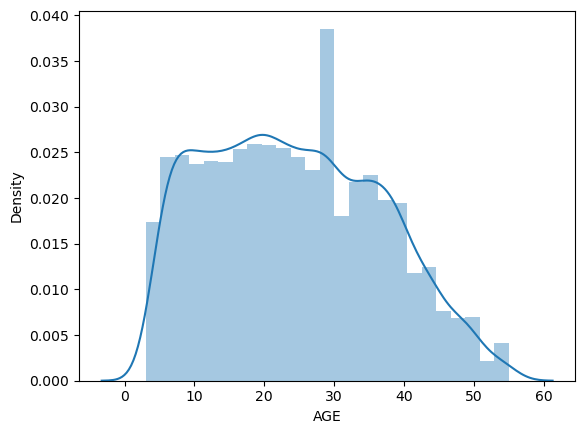

In [58]:
sns.distplot(df['AGE'])

<AxesSubplot:xlabel='AGE', ylabel='SALES_PRICE'>

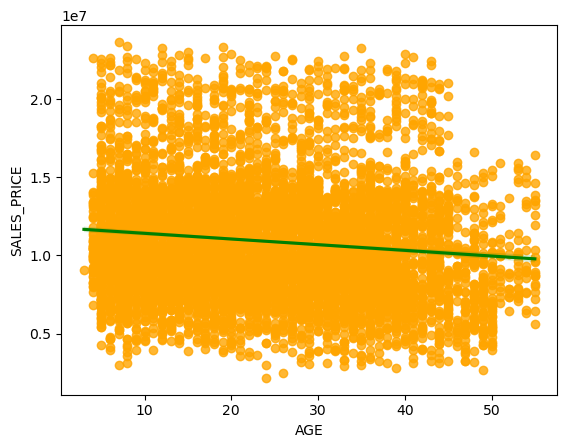

In [59]:
sns.regplot(x='AGE',y='SALES_PRICE',data=df,scatter_kws={'color':'orange'},line_kws={'color':'green'})

No Relationship in between the AGE feature and SALES_PRICE

## From the Exploratory Data Analysis

#### Droping features which are no relationship with SALES_PRICE

In [60]:
df.drop(['SALE_COND','QS_OVERALL','DIST_MAINROAD','QS_ROOMS','QS_BEDROOM','QS_BATHROOM','DATE_BUILD','DATE_SALE'],axis=1,inplace=True)

In [61]:
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE
0,Karapakkam,1004,1,1,3,Yes,Commercial,AllPub,Paved,A,7600000,44
1,Anna Nagar,1986,2,1,5,No,Commercial,AllPub,Gravel,RH,21717770,11
2,Adyar,909,1,1,3,Yes,Commercial,ELO,Gravel,RL,13159200,20
3,Velachery,1855,3,2,5,No,Others,NoSewr,Paved,I,9630290,22
4,Karapakkam,1226,1,1,3,Yes,Others,AllPub,Gravel,C,7406250,30


## Encoding

##### Label Encoding for binary class and multi calss ordinal data

In [62]:
df.AREA = df.AREA.map({'Karapakkam':0, 'Adyar':1, 'Chrompet':2, 'Velachery':3, 'KK Nagar':4, 'Anna Nagar':5, 'T Nagar':6})
df.PARK_FACIL = df.PARK_FACIL.map({'Yes':1, 'No':0})
df.UTILITY_AVAIL = df.UTILITY_AVAIL.map({'ELO':0, 'NoSewr':1, 'AllPub':2})
df.STREET = df.STREET.map({'No Access':0, 'Paved':1, 'Gravel':2})
df.MZZONE = df.MZZONE.map({'A':0, 'C':1, 'I':2, 'RH':4, 'RL':5, 'RM':6})

#### One-Hot Encoding for multi-class Nominal data

In [63]:
df=pd.get_dummies(df,columns=['BUILDTYPE'])
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,0,1004,1,1,3,1,2,1,0,7600000,44,1,0,0
1,5,1986,2,1,5,0,2,2,4,21717770,11,1,0,0
2,1,909,1,1,3,1,0,2,5,13159200,20,1,0,0
3,3,1855,3,2,5,0,1,1,2,9630290,22,0,0,1
4,0,1226,1,1,3,1,2,2,1,7406250,30,0,0,1


In [64]:
df.dtypes

AREA                    int64
INT_SQFT                int64
N_BEDROOM               int32
N_BATHROOM              int32
N_ROOM                  int64
PARK_FACIL              int64
UTILITY_AVAIL           int64
STREET                  int64
MZZONE                  int64
SALES_PRICE             int64
AGE                     int64
BUILDTYPE_Commercial    uint8
BUILDTYPE_House         uint8
BUILDTYPE_Others        uint8
dtype: object

## Models

### 1.Linear Regression Model

In [65]:
X=df.drop('SALES_PRICE',axis=1)
y=df['SALES_PRICE'].values

Spliting

In [66]:
X_train,X_test, y_train,y_test= train_test_split(X,y, test_size=0.2)

Scaling

In [67]:
scaler=StandardScaler()
scaler.fit(X_train,y_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

Model Fitting

In [68]:
regressor = LinearRegression()
regressor.fit(X_train_scaled,y_train)

LinearRegression()

Predicting Values

In [69]:
y_pred = regressor.predict(X_test_scaled)
y_pred

array([13922544.30243683, 13684976.30243683, 11133168.30243683, ...,
       11866352.30243683, 14749936.30243683,  5935344.30243683])

In [70]:
print('R2- SCORE:', r2_score(y_test,y_pred))

R2- SCORE: 0.9172440025955603


#### 2). K Nearest Neighbours Algorithm (KNN)

In [71]:
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsRegressor(i)
  knn.fit(X_train_scaled,y_train) 
  print("K value  : " , i, " train score : ", knn.score(X_train_scaled,y_train) , " score : ", np.mean(cross_val_score(knn, X_train_scaled, y_train, cv=10)))

K value  :  1  train score :  0.9999970006230307  score :  0.9343150530008153
K value  :  2  train score :  0.9841882445760234  score :  0.9482626704265984
K value  :  3  train score :  0.9782914914597939  score :  0.9513658125051994
K value  :  4  train score :  0.9739764334587546  score :  0.9518616393635748
K value  :  5  train score :  0.9704764570130492  score :  0.9513386643566377
K value  :  6  train score :  0.9674675745832059  score :  0.9510734300775285
K value  :  7  train score :  0.9652034497326173  score :  0.9507680749246996
K value  :  8  train score :  0.963711832867761  score :  0.9501628580898094
K value  :  9  train score :  0.9619181730037023  score :  0.9493404912050503
K value  :  10  train score :  0.9602862079204604  score :  0.9485487160539952
K value  :  20  train score :  0.9479389676425327  score :  0.9394420233600304
K value  :  50  train score :  0.9251083611939168  score :  0.9177643765931182


In [72]:
knn = KNeighborsRegressor(3)
knn.fit(X_train_scaled,y_train)
knn.score(X_test_scaled,y_test)

0.9556516362750865

#### 3). Decision Tree Regressor Algorithm

fitting the model

In [73]:
dt = DecisionTreeRegressor(max_depth = 4)
dt.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=4)

Predicted Values

In [74]:
y_pred = dt.predict(X_test_scaled)
y_pred

array([13786480.625     , 13786480.625     , 12378998.06358382, ...,
       10865419.95481928, 13786480.625     ,  7805080.8419244 ])

Evaluation Metric - R2 Score

In [75]:
print('R2- SCORE:', r2_score(y_test,y_pred))

R2- SCORE: 0.886706967487203


#### 4). Random Forest Regressor Algorithm

fitting the model

In [76]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
rf = RandomForestRegressor(n_estimators= 100, max_depth = 4, max_features='sqrt')
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

predicting the values

In [77]:
y_pred = rf.predict(X_test_scaled) 
y_pred

array([13152092.39153805, 11559597.20621326, 11776343.34476475, ...,
       11105234.53897814, 14319452.71591711,  7982218.30628307])

Evaluation Metrics R2-Score

In [78]:
print('R2- SCORE:', r2_score(y_test,y_pred))

R2- SCORE: 0.8692328551935996


#### 5). XG Boost Algorithm

Model fitting 

In [79]:
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0)
  model.fit(X_train_scaled,y_train)
  model.score(X_test_scaled, y_test) # scoring the model - r2 squared
  print("Learning rate : ", lr, " Train score : ", model.score(X_train_scaled,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train_scaled,y_train)))

Learning rate :  0.01  Train score :  -0.3179671301871927  Cross-Val score :  -0.3305571540344009
Learning rate :  0.02  Train score :  0.8040359198351162  Cross-Val score :  0.7965559127247193
Learning rate :  0.03  Train score :  0.9639058110093494  Cross-Val score :  0.9584361998503506
Learning rate :  0.04  Train score :  0.9886263728127919  Cross-Val score :  0.9840850570758196
Learning rate :  0.05  Train score :  0.993679023122909  Cross-Val score :  0.98947469913319
Learning rate :  0.06  Train score :  0.9953401989472058  Cross-Val score :  0.9914293669865835
Learning rate :  0.07  Train score :  0.9961613140905647  Cross-Val score :  0.9923545026111367
Learning rate :  0.08  Train score :  0.996639208095459  Cross-Val score :  0.992951084512165
Learning rate :  0.09  Train score :  0.9968933084276224  Cross-Val score :  0.9932961293207864
Learning rate :  0.1  Train score :  0.9971169324781199  Cross-Val score :  0.9933062440307845
Learning rate :  0.11  Train score :  0.9972

Evaluation Metrics R2 score

In [80]:
model = xgb.XGBRegressor(learning_rate = 0.7, n_estimators=100)
model.fit(X_train_scaled,y_train)
model.score(X_test_scaled, y_test)

0.9890819470085773

## Feature Importance

In [81]:
from sklearn.feature_selection import RFE

In [82]:
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X_train_scaled, y_train)
list(zip(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'PARK_FACIL',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'AGE',
       'BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Other'],selector.support_))

[('AREA', True),
 ('INT_SQFT', False),
 ('N_BEDROOM', True),
 ('N_BATHROOM', False),
 ('N_ROOM', True),
 ('PARK_FACIL', False),
 ('UTILITY_AVAIL', False),
 ('STREET', False),
 ('MZZONE', True),
 ('AGE', False),
 ('BUILDTYPE_Commercial', True),
 ('BUILDTYPE_House', False),
 ('BUILDTYPE_Other', False)]

In [83]:
from sklearn.feature_selection import SequentialFeatureSelector

In [84]:
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator, n_features_to_select=3)
sfs.fit(X_train_scaled, y_train)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=3)

Text(0.5, 1.0, 'Feature Importance')

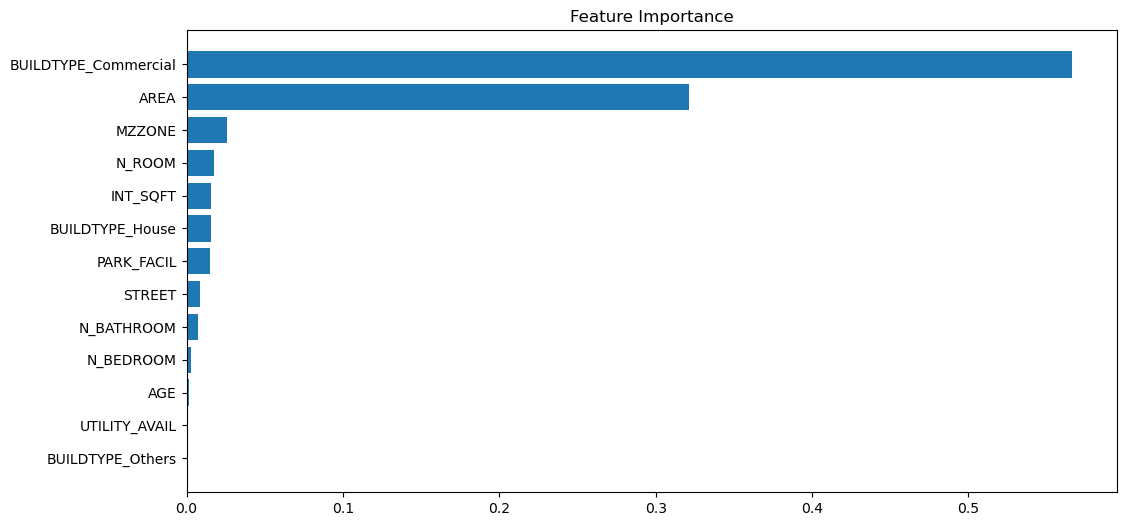

In [85]:
f_m = model.feature_importances_
sorted_idx = np.argsort(f_m)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), f_m[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

##### The Columns BUILDTYPE_Commercial & AREA  are the most important features to be considerd inorder to predict the model.

Report:R2 Scores of all models are

Linear Regression - 0.917

K Nearest Neighbours - 0.952

Decision Tree - 0.882

Random Forest - 0.862

XG Boost - 0.988

##### Conclusion: The best Machine Learning algorithm for Chennai House Price Prediction is XG Boost Model.